In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from plotnine import *
from numpy.linalg import svd

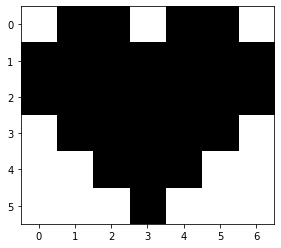

In [2]:
serce = np.array([[0,1,1,0,1,1,0],
              [1,1,1,1,1,1,1],
              [1,1,1,1,1,1,1],
              [0,1,1,1,1,1,0],
              [0,0,1,1,1,0,0],
              [0,0,0,1,0,0,0],
             ])
plt.imshow(1-serce, cmap='gray')
plt.show()

#### Zadanie - obrazy każdej wartości osobliwej

Przygotuj macierze rezprezentujące obrazy każdej wartości osobliwej. 

In [3]:
# U, S, V = svd(serce)
# sigma = np.diag(S)

In [4]:
def each_singular_value(img_matrix, k):
    
    if len(img_matrix.shape)==3:
        img_flat = img_matrix.reshape(-1,3)

        img_sr = img_flat.mean(axis=1)
        img_matrix = img_sr.reshape(img_matrix.shape[:-1])
        
    U, S, V = svd(img_matrix)
    
    imgs = []

    for k in range(1, k + 1):
        Uk=U[:,k-1:k]
        Sk=S[k-1:k]
        Vk=V[k-1:k,:]

        obraz_all = np.matmul(np.matmul(Uk, np.diag(Sk)), Vk)

        imgs.append(obraz_all)
        
    return imgs, U, S, V

In [5]:
imgs, U, S, V = each_singular_value(serce, 6)

#### Zadanie - skumulowane obrazy kolejnych wartości osobliwych

Przygotuj macierze rezprezentujące obrazy skumulowanych kolejnych wartości osobliwych. 

In [6]:
def cumulative_value_of_singularities(img_matrix, k):
    
    if len(img_matrix.shape)==3:
        img_flat = img_matrix.reshape(-1,3)

        img_sr = img_flat.mean(axis=1)
        img_matrix = img_sr.reshape(img_matrix.shape[:-1])
    
    U, S, V = svd(img_matrix)
    
    razem_imgs = []

    for k in range(1, k + 1):
        Uk=U[:,:k]
        Sk=S[:k]
        Vk=V[:k,:]

        obraz_all = np.matmul(np.matmul(Uk, np.diag(Sk)), Vk)

        razem_imgs.append(obraz_all)
    
    return razem_imgs, U, S, V

In [7]:
razem_imgs, U, S, V = cumulative_value_of_singularities(serce, 6)

#### Wizualizacja każdej wartości osobliwych

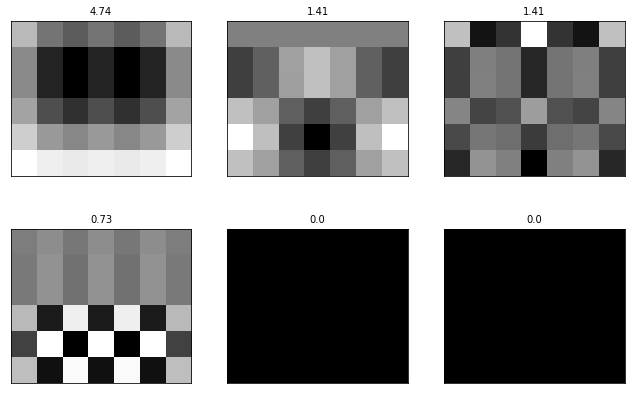

In [8]:
fig, axes = plt.subplots(2, 3, figsize=(11, 7),
                         subplot_kw={'xticks':[], 'yticks':[]})
for i, ax in enumerate(axes.flat):
    ax.imshow(1-imgs[i], cmap='gray')
    ax.set_title(np.round(S[i],2), fontsize=10)
plt.show()

#### Wizualizacja kolejnych skumulowanych wartości osobliwych


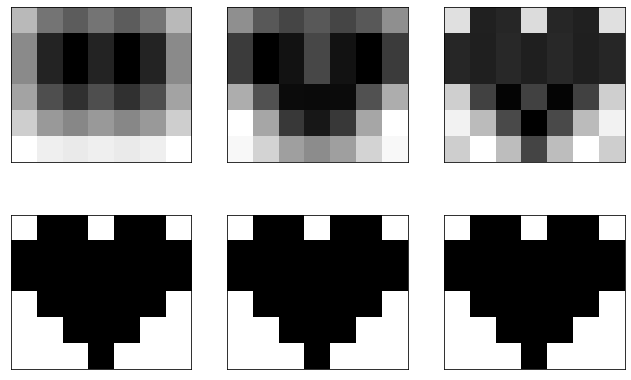

In [9]:
fig, axes = plt.subplots(2, 3, figsize=(11, 7),
                         subplot_kw={'xticks':[], 'yticks':[]})
for i, ax in enumerate(axes.flat):
    ax.imshow(1-razem_imgs[i], cmap='gray')
plt.show()

#### Zadanie - obrazy każdej wartości osobliwej

Przygotuj macierze rezprezentujące obrazy 60 pierwszych wartości osobliwych. 

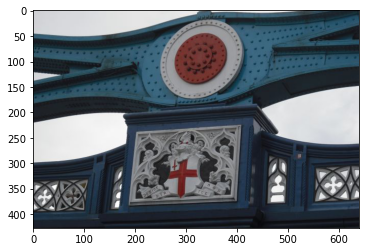

In [10]:
most = plt.imread('most.jpg', format='jpeg')
plt.imshow(most)
plt.show()

In [11]:
imgs, U, S, V = each_singular_value(most, 60)

#### Zadanie - skumulowane obrazy kolejnych wartości osobliwych

Przygotuj macierze rezprezentujące obrazy skumulowanych kolejnych 60 pierwszych wartości osobliwych. 

In [12]:
razem_imgs, U, S, V = cumulative_value_of_singularities(most, 60)

#### Wizualizacja każdej wartości osobliwych


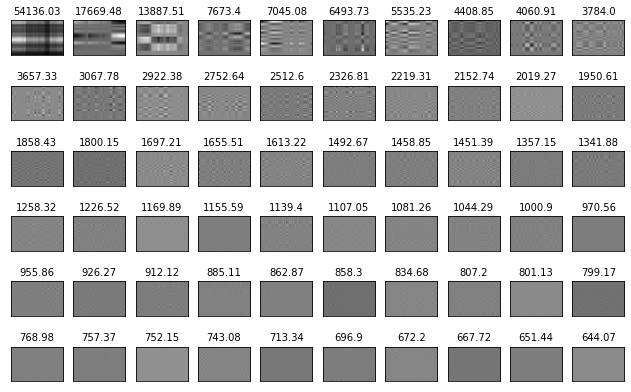

In [13]:
fig, axes = plt.subplots(6, 10, figsize=(11, 7),
                         subplot_kw={'xticks':[], 'yticks':[]})
for i, ax in enumerate(axes.flat):
    ax.imshow(imgs[i], cmap='gray')
    ax.set_title(np.round(S[i],2), fontsize=10)
plt.show()

#### Wizualizacja kolejnych skumulowanych wartości osobliwych


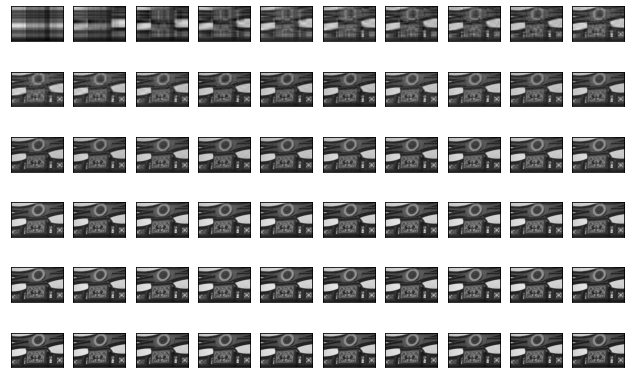

In [14]:
fig, axes = plt.subplots(6, 10, figsize=(11, 7),
                         subplot_kw={'xticks':[], 'yticks':[]})
for i, ax in enumerate(axes.flat):
    ax.imshow(razem_imgs[i], cmap='gray')
plt.show()